# На табличной задачи из sklern для random forest
## Построить графики зависимости:
1) Метрики качества классификации от кол-во деревьев. 
2) Качество обучения от глубины деревьев



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_olivetti_faces
from numpy import argmax
import matplotlib.pyplot as plt

### Загрузка табличного сета. 
Load the Olivetti faces data-set from AT&T (classification).

Download it if necessary.

|   |   |
|---|---|
| Classes  |  40 |  
|  Samples total | 4000  |   
|  Dimensionality | 4096  |   

In [28]:
X, Y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Pavel\scikit_learn_data


In [29]:
def get_score(max_depth = None, n_estimators = 5):
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators = n_estimators, random_state=0)
    clf.fit(X_train, Y_train)
    return clf.score(X_test, Y_test)

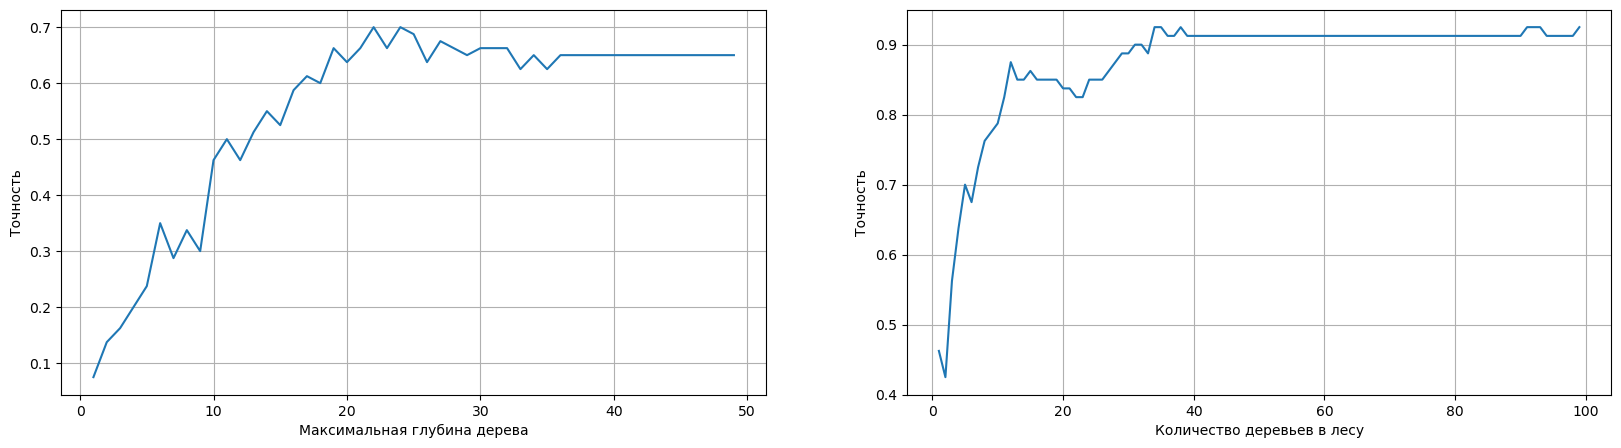

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

y_max_depth = []
y_n_estimators = []
for max_depth in range(1,50):
    y_max_depth.append(get_score(max_depth))
axs[0].plot(range(1,50), y_max_depth)
axs[0].set_ylabel("Точность")
axs[0].set_xlabel("Максимальная глубина дерева")
axs[0].grid(True)
max_depth = argmax(y_max_depth) + 1
for n_estimators in range(1,100):
    y_n_estimators.append(get_score(max_depth, n_estimators))
axs[1].plot(range(1,100), y_n_estimators)
axs[1].set_ylabel("Точность")
axs[1].set_xlabel("Количество деревьев в лесу")
axs[1].grid(True)
n_estimators = argmax(y_n_estimators) + 1

plt.show()